In [1]:
#!conda install --yes cartopy
#!conda install --yes mapclassify

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cart
from mapclassify import Quantiles, EqualInterval
import plotly.express as px
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

In [3]:
df=pd.read_excel('new bd.xlsx')
df

,STATION,Latitude,Longitude,ICL,IH,IS,IPI,ICD,IFM,CONCLUSION
0,TUNIS-CARTHAGE,36.83,8.75,59.852006,2.154819,8.354,0.863577,1.232984,0.236757,DANGER FAIBLE
1,JENDOUBA,36.48,8.80,66.727054,2.554139,9.308,1.082824,1.631689,0.317294,DANGER FAIBLE
2,KAIROUAN,35.67,10.10,62.840617,2.334484,8.930,0.922924,1.412382,0.260977,DANGER FAIBLE
3,TOZEUR,34.00,8.17,77.914112,3.455747,9.398,2.694867,2.531652,0.896629,DANGER FAIBLE
4,GABES,33.95,10.04,44.778295,1.041283,7.616,0.228932,0.120750,0.048378,DANGER FAIBLE
5,JERBA,33.66,10.80,51.864360,1.345748,7.850,0.617102,0.424924,0.142751,DANGER FAIBLE
6,REMADA,32.32,10.40,74.800000,2.811851,9.596,2.183444,1.888967,0.665345,DANGER FAIBLE
7,TABARKA,36.95,8.75,69.763207,3.171181,9.236,1.080733,2.247643,0.346415,DANGER FAIBLE
8,BIZERTE,37.25,9.80,52.180562,1.587039,7.976,0.472101,0.665949,0.115690,DANGER FAIBLE
9,KELIBIA,36.88,11.08,43.810000,1.449296,7.562,0.112676,0.528362,0.026745,DANGER FAIBLE


In [4]:
df.iloc[:,3:]

,ICL,IH,IS,IPI,ICD,IFM,CONCLUSION
0,59.852006,2.154819,8.354,0.863577,1.232984,0.236757,DANGER FAIBLE
1,66.727054,2.554139,9.308,1.082824,1.631689,0.317294,DANGER FAIBLE
2,62.840617,2.334484,8.930,0.922924,1.412382,0.260977,DANGER FAIBLE
3,77.914112,3.455747,9.398,2.694867,2.531652,0.896629,DANGER FAIBLE
4,44.778295,1.041283,7.616,0.228932,0.120750,0.048378,DANGER FAIBLE
5,51.864360,1.345748,7.850,0.617102,0.424924,0.142751,DANGER FAIBLE
6,74.800000,2.811851,9.596,2.183444,1.888967,0.665345,DANGER FAIBLE
7,69.763207,3.171181,9.236,1.080733,2.247643,0.346415,DANGER FAIBLE
8,52.180562,1.587039,7.976,0.472101,0.665949,0.115690,DANGER FAIBLE
9,43.810000,1.449296,7.562,0.112676,0.528362,0.026745,DANGER FAIBLE


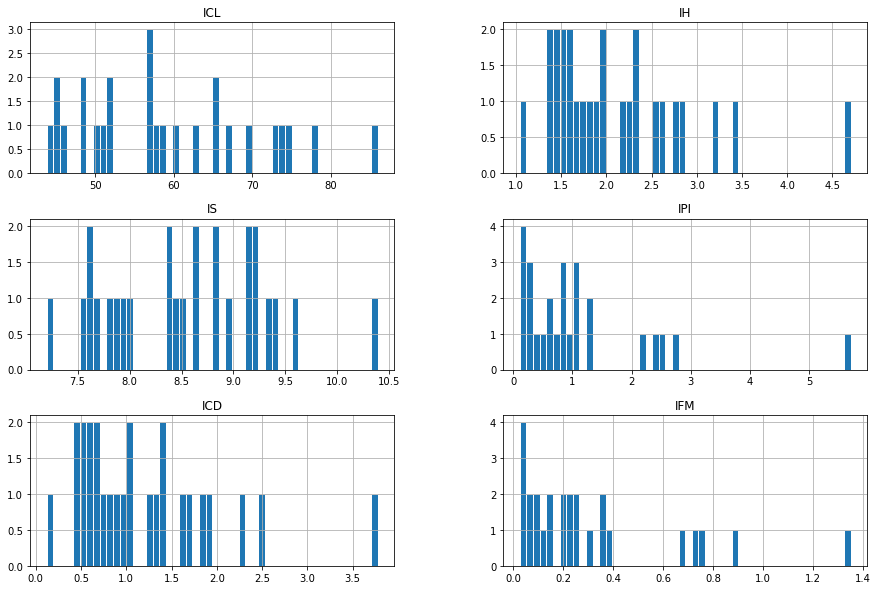

In [5]:
df.iloc[:,3:].hist(bins=50, figsize=(15,10), ec='w')
plt.show()

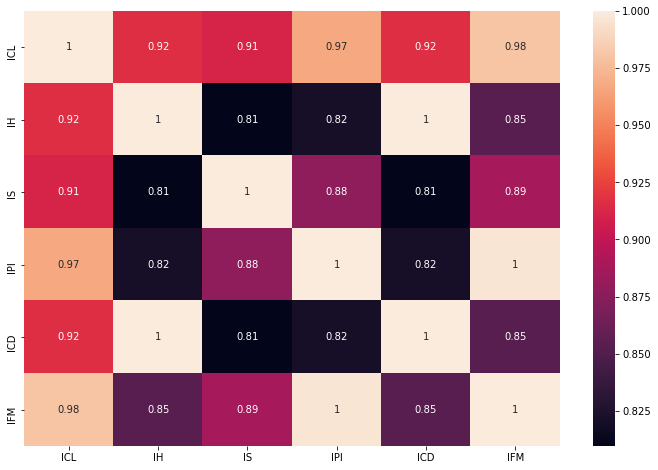

In [6]:
corr_matrix = df.iloc[:,3:].corr(method='spearman')
ax = plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix, annot=True)

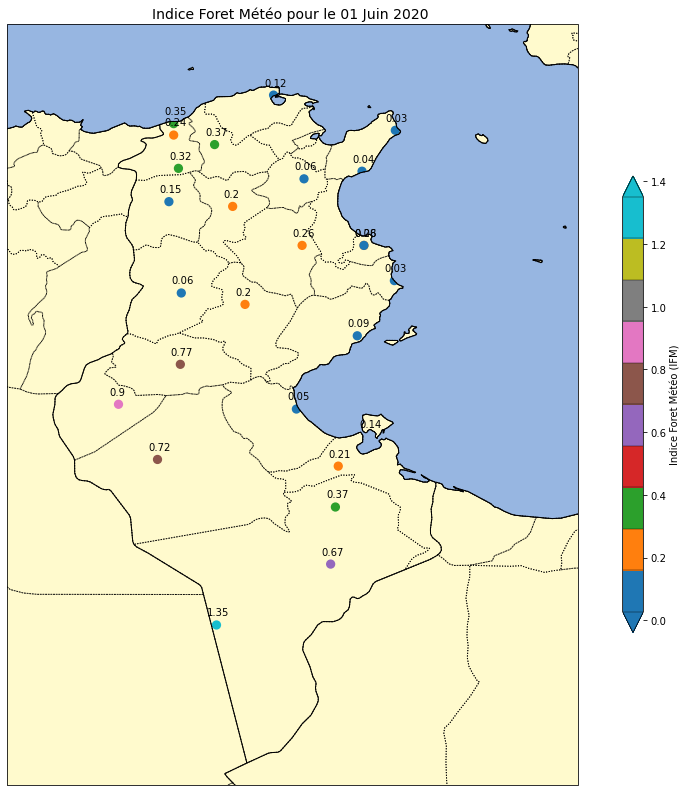

In [7]:
lat= df['Latitude'].values
lon= df['Longitude'].values
i=df['IFM'].values
b=df['CONCLUSION'].values

fig = plt.figure(figsize=(16, 14))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([7, 13, 30, 38],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cart.feature.LAND, zorder=0.1, edgecolor='k', facecolor="lemonchiffon")
ax.add_feature(cart.feature.OCEAN, zorder=1, edgecolor='k')
ax.add_feature(cart.feature.LAKES, alpha=0.3)
ax.add_feature(cfeature.STATES, linestyle='dotted')
ax.stock_img()

for j in range(len(df)):
    ax.text(lon[j]-0.1, lat[j]+0.1,round(df['IFM'][j],2))

plt.scatter(lon, lat, c=i, cmap='tab10', linewidth=1.5, alpha=1, s=60)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Indice Foret Météo pour le 01 Juin 2020 ', fontsize=14)

cbar=plt.colorbar(label='Indice Foret Météo (IFM)', shrink=0.6, drawedges='True', ticks=np.arange(0, 2, 0.2), extend='both')
#cbar.minorticks_on()
#sns.set(style="darkgrid", palette="pastel", color_codes=True) #blanchir l'arriere plan

plt.show()
fig.savefig('carte ifm.png')